In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [3]:
# load the data into dataframe
seeds = pd.read_csv('seeds_dataset.txt', 
                    sep='\t', 
                    names=['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry_coeff', 'length_groove', 'label']
                   )

In [4]:
# quick look if it came in right
seeds.tail()

,area,perimeter,compactness,length,width,asymmetry_coeff,length_groove,label
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3


In [5]:
# check if types were recognized correctly
seeds.dtypes

area               float64
perimeter          float64
compactness        float64
length             float64
width              float64
asymmetry_coeff    float64
length_groove      float64
label                int64
dtype: object

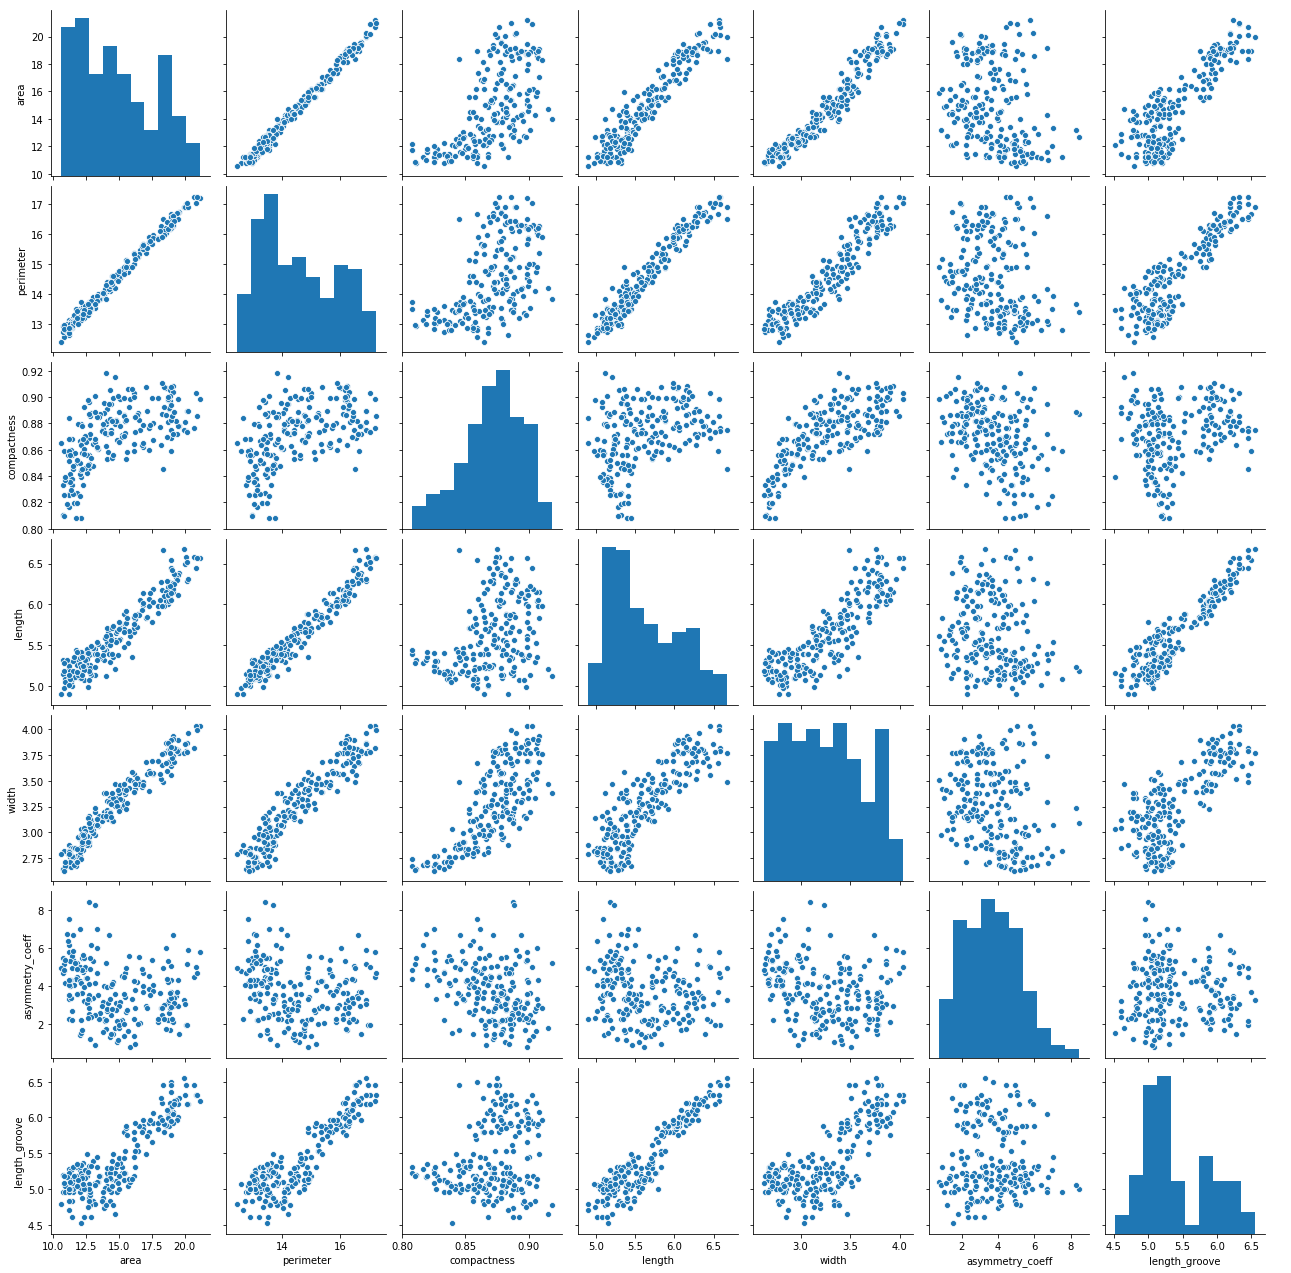

In [6]:
# overview of what the data looks like
sns.pairplot(seeds[seeds.columns[:-1]])

In [7]:
# check if basic method works
kmeans = KMeans(n_clusters=16, random_state=0).fit(seeds[seeds.columns[:-1]])
print(kmeans.labels_)

[ 8  8  3  3  8  3  9  3  1  1  9  3  9  3  3  9  9  8  8 13  3  3  8 12
  8  8 13 12  3 13 12  9  9  3  8  1  1  1  9  7  3  3 12  9  9  3  8  9
  3  8  9  5  9  9  8  8  3  8  8 12 12 12 13 13 12 12  8  3  8 13  5  5
  5  6  5  5  5 11 15  1  5 15 11 14 14  6  6  2 11 11 14  2  2 15 15  5
  2  6  6  6  5  6  2  2  2  6  6  5 14  6  6  2  6 15 11  6  2  2  2 14
 11  2  5  6  1  2  2  6 14  5  6  6  9  5  5  9  5  1  1  5  4  7  7  4
  4 10 12  4 13  0  4 10  4  0  0 10  0  4  4  4 13  4  4  4 10 12  4 13
  0  0 10 10  0 10  0  0  0  0 10 12  0  4  4  4  7  0  4  0 10  0  0  0
 13  0 13  4  4  4 13 13  4 12  0  7 13 13  0  7 13  4]


In [8]:
# how many clusters to chose?
# only parameter to make difference here is k
# look at different indices for different k

# dunn index not in sklearn, found at https://github.com/jqmviegas/jqm_cvi
from dunn import dunn, dunn_fast

indices = pd.DataFrame(columns=['number', 'Calinski-Harabasz', 'Davies-Bouldin', 'Silhouette', 'Dunn', 'Distances'])

for i in range(2, 10):
    
    kmeans = KMeans(n_clusters=i, random_state=0).fit(seeds[seeds.columns[:-1]])
    
    ch = metrics.calinski_harabaz_score(seeds[seeds.columns[:-1]], kmeans.labels_)
    db = metrics.davies_bouldin_score(seeds[seeds.columns[:-1]], kmeans.labels_)
    si = metrics.silhouette_score(seeds[seeds.columns[:-1]], kmeans.labels_)
    dn = dunn_fast(seeds[seeds.columns[:-1]], kmeans.labels_)
    di = kmeans.inertia_
    
    indices = indices.append({'number': i,
                              'Calinski-Harabasz': ch,
                              'Davies-Bouldin': db,
                              'Silhouette': si,
                              'Dunn': dn, 
                              'Distances': di}, 
                             ignore_index=True)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/opt/tljh/user/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/opt/tljh/user/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/opt/tljh/user/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/opt/tljh/user/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divid

In [9]:
indices

,number,Calinski-Harabasz,Davies-Bouldin,Silhouette,Dunn,Distances
0,2.0,351.179992,0.690980,0.518287,0.040384,1011.712345
1,3.0,375.804961,0.753314,0.471934,0.085507,587.318612
2,4.0,327.855313,0.887602,0.396465,0.075360,471.003396
3,5.0,310.331840,0.915267,0.361323,0.091359,385.507292
4,6.0,301.837149,0.928449,0.361271,0.106061,323.870248
5,7.0,295.382574,0.917866,0.367379,0.062993,279.517700
6,8.0,297.386545,0.940332,0.361192,0.083766,240.578354
7,9.0,288.810692,0.899075,0.359025,0.078140,217.676083


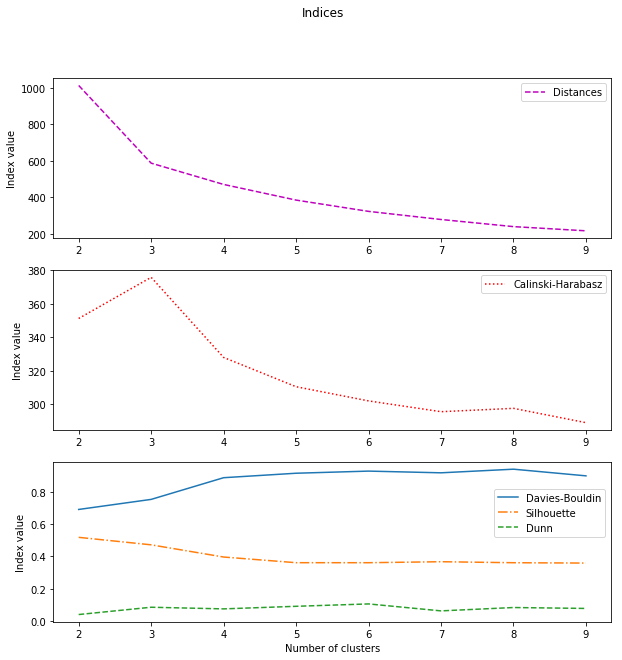

CPU times: user 435 ms, sys: 4.01 ms, total: 439 ms
Wall time: 444 ms


In [22]:
%%time
x = np.array(indices['number'])
Y = np.array(indices[['Calinski-Harabasz', 'Davies-Bouldin', 'Silhouette', 'Dunn', 'Distances']])

fig = plt.figure(figsize=(10, 10))
fig.suptitle('Indices')

ax = fig.add_subplot(3,1,1)
ax.plot(x, Y[:, 4], label='Distances', color='m', linestyle='dashed', linewidth=1.5)
ax.legend()
ax.set_ylabel('Index value')

ax = fig.add_subplot(3,1,2)
ax.plot(x, Y[:, 0], label='Calinski-Harabasz', color='r', linestyle='dotted', linewidth=1.5)
ax.legend()
ax.set_ylabel('Index value')

ax = fig.add_subplot(3,1,3)
ax.plot(x, Y[:, 1], label='Davies-Bouldin', linestyle='solid', linewidth=1.5)
ax.plot(x, Y[:, 2], label='Silhouette', linestyle='dashdot', linewidth=1.5)
ax.plot(x, Y[:, 3], label='Dunn', linestyle='dashed', linewidth=1.5)
ax.legend(bbox_to_anchor=(0.78,0.5))
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Index value')

plt.show()

Distances show kink at 3 clusters, C-H peaks at 3 clusters, others seem inconclusive but flatten out around the 3 to 4 cluster mark. This seems in line with the information we have going in of having three different types of seeds in the dataset. 

In [50]:
# 'final' configuration
kmeans = KMeans(n_clusters=3, random_state=0).fit(seeds[seeds.columns[:-1]])

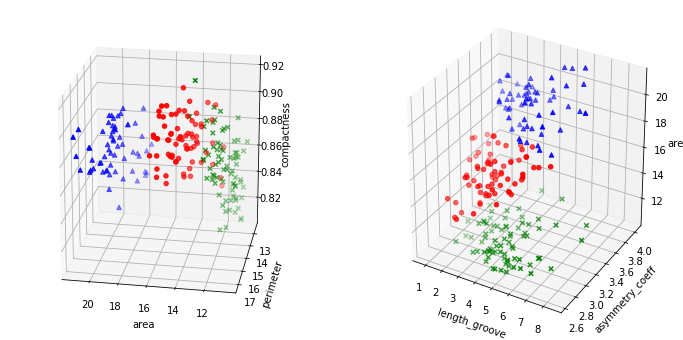

In [73]:
# what does it look like?
# first combine data and labels
labeled_seeds = np.c_[seeds[seeds.columns[:-1]], kmeans.labels_]

fig = plt.figure(figsize=(12, 6))

# show first angle
ax = fig.add_subplot(121, projection='3d', azim=100, elev=20)

for c, m, l in [('r', 'o', 0), ('b', '^', 1), ('g', 'x', 2)]:
    xs = labeled_seeds[labeled_seeds[:,-1] == l][:, 0]
    ys = labeled_seeds[labeled_seeds[:,-1] == l][:, 1]
    zs = labeled_seeds[labeled_seeds[:,-1] == l][:, 2]
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel(seeds.columns[0])
ax.set_ylabel(seeds.columns[1])
ax.set_zlabel(seeds.columns[2])
ax.set_title('')

# show second angle
ax = fig.add_subplot(122, projection='3d')

for c, m, l in [('r', 'o', 0), ('b', '^', 1), ('g', 'x', 2)]:
    xs = labeled_seeds[labeled_seeds[:,-1] == l][:, 5]
    ys = labeled_seeds[labeled_seeds[:,-1] == l][:, 4]
    zs = labeled_seeds[labeled_seeds[:,-1] == l][:, 0]
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel(seeds.columns[6])
ax.set_ylabel(seeds.columns[5])
ax.set_zlabel(seeds.columns[0])
ax.set_title('')

plt.show()

In [74]:
kmeans.cluster_centers_

array([[14.64847222, 14.46041667,  0.87916667,  5.56377778,  3.27790278,
         2.64893333,  5.19231944],
       [18.72180328, 16.29737705,  0.88508689,  6.20893443,  3.72267213,
         3.60359016,  6.06609836],
       [11.96441558, 13.27480519,  0.8522    ,  5.22928571,  2.87292208,
         4.75974026,  5.08851948]])

The clustering seems adequate when looking at three dimensional subsets of the data (looking at the full dimensions sure would be nice, but the limitations of the brain and all..). All clusters seem to be reasonably coherent, of similar size (the raw data showed an even thirds split) and exhibit more or less the rounded shape expected from kmeans clustering.

The question remains, if this could be improved on. Two ideas that spring to mind are norming and scaling as well as the somewhat more involved process of principal component analysis. Deeper examination seems beyond the scope of this work, but a brief look should be possible.

In [81]:
# principal component analysis. 
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
_ = pca.fit_transform(seeds[seeds.columns[:-1]])
with np.printoptions(precision=4, suppress=True):
    print('explained variance:', pca.explained_variance_ratio_)

explained variance: [0.8294 0.1636 0.0057 0.001  0.0002]


In [86]:
# given that the first two components explain 99.3% of variance and the first three
# explain 99.9%, it seems logical to look at these two options

# do the transform
pca = PCA(n_components=3)
seeds_pca_three = pca.fit_transform(seeds[seeds.columns[:-1]])
seeds_pca_two = seeds_pca_three[:, 0:2]

# do the clustering
kmeans_pca_two = KMeans(n_clusters=3, random_state=0).fit(seeds_pca_two)
kmeans_pca_three = KMeans(n_clusters=3, random_state=0).fit(seeds_pca_three)

# label the transformed data
seeds_pca_two_labeled = np.c_[seeds_pca_two, kmeans_pca_two.labels_]
seeds_pca_three_labeled = np.c_[seeds_pca_three, kmeans_pca_three.labels_]

# label the original data with the transformed labels
seeds_pca_two_labeled_original = np.c_[seeds[seeds.columns[:-1]], kmeans_pca_two.labels_]
seeds_pca_three_labeled_original = np.c_[seeds[seeds.columns[:-1]], kmeans_pca_three.labels_]

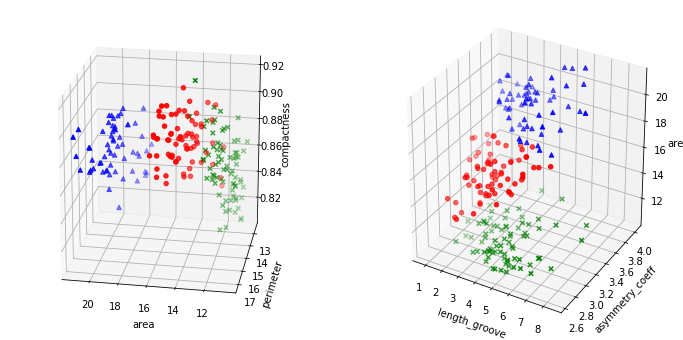

In [89]:
# what does 3d PCA clustering look like?
fig = plt.figure(figsize=(12, 6))

# show first angle
ax = fig.add_subplot(121, projection='3d', azim=100, elev=20)

for c, m, l in [('r', 'o', 0), ('b', '^', 1), ('g', 'x', 2)]:
    xs = seeds_pca_three_labeled_original[seeds_pca_three_labeled_original[:,-1] == l][:, 0]
    ys = seeds_pca_three_labeled_original[seeds_pca_three_labeled_original[:,-1] == l][:, 1]
    zs = seeds_pca_three_labeled_original[seeds_pca_three_labeled_original[:,-1] == l][:, 2]
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel(seeds.columns[0])
ax.set_ylabel(seeds.columns[1])
ax.set_zlabel(seeds.columns[2])
ax.set_title('')

# show second angle
ax = fig.add_subplot(122, projection='3d')

for c, m, l in [('r', 'o', 0), ('b', '^', 1), ('g', 'x', 2)]:
    xs = seeds_pca_three_labeled_original[seeds_pca_three_labeled_original[:,-1] == l][:, 5]
    ys = seeds_pca_three_labeled_original[seeds_pca_three_labeled_original[:,-1] == l][:, 4]
    zs = seeds_pca_three_labeled_original[seeds_pca_three_labeled_original[:,-1] == l][:, 0]
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel(seeds.columns[6])
ax.set_ylabel(seeds.columns[5])
ax.set_zlabel(seeds.columns[0])
ax.set_title('')

plt.show()

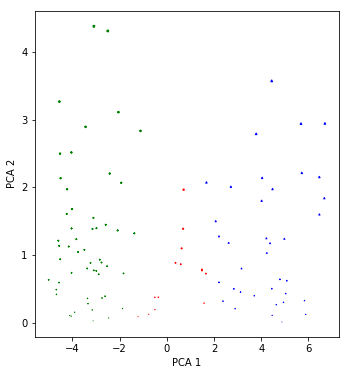

In [92]:
# what does 2d PCA clustering look like?
fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(121)

for c, m, l in [('r', 'o', 0), ('b', '^', 1), ('g', 'x', 2)]:
    xs = seeds_pca_three_labeled[seeds_pca_three_labeled_original[:,-1] == l][:, 0]
    ys = seeds_pca_three_labeled[seeds_pca_three_labeled_original[:,-1] == l][:, 1]
    zs = seeds_pca_three_labeled[seeds_pca_three_labeled_original[:,-1] == l][:, 1]
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('')

plt.show()

In [104]:
indices_comparison = pd.DataFrame(columns=['method', 'Calinski-Harabasz', 'Davies-Bouldin', 'Silhouette', 'Dunn', 'Distances'])

for attr, value in {'kmeans': kmeans, 'kmeans pca 2d': kmeans_pca_two, 'kmeans pca 3d': kmeans_pca_three}.items():
    ch = metrics.calinski_harabaz_score(seeds[seeds.columns[:-1]], value.labels_)
    db = metrics.davies_bouldin_score(seeds[seeds.columns[:-1]], value.labels_)
    si = metrics.silhouette_score(seeds[seeds.columns[:-1]], value.labels_)
    dn = dunn_fast(seeds[seeds.columns[:-1]], value.labels_)
    di = value.inertia_
    
    indices_comparison = indices_comparison.append({'method': attr,
                                                    'Calinski-Harabasz': ch,
                                                    'Davies-Bouldin': db,
                                                    'Silhouette': si,
                                                    'Dunn': dn, 
                                                    'Distances': di}, 
                                                   ignore_index=True)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/opt/tljh/user/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/opt/tljh/user/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [105]:
indices_comparison

,method,Calinski-Harabasz,Davies-Bouldin,Silhouette,Dunn,Distances
0,kmeans,375.804961,0.753314,0.471934,0.085507,587.318612
1,kmeans pca 2d,375.804961,0.753314,0.471934,0.085507,569.889890
2,kmeans pca 3d,375.804961,0.753314,0.471934,0.085507,584.078516


It appears PCA did not make much of a difference to this dataset, if at all.

When looking at the pairplot, it does not appear as if the features are normally distributed. Assessing the true underlying kind of distribution does not seem feasible with the amount of data given. Standardizing does not appear as a good solution then. Normalizing though does not seem problematic and can be tried (scaling all values between 0 an 1).

In [107]:
# normalize the data
seeds_normalized = (seeds-seeds.min())/(seeds.max()-seeds.min())

In [109]:
kmeans_normalized = KMeans(n_clusters=3, random_state=0).fit(seeds_normalized[seeds_normalized.columns[:-1]])

In [110]:
indices_comparison = pd.DataFrame(columns=['method', 'Calinski-Harabasz', 'Davies-Bouldin', 'Silhouette', 'Dunn', 'Distances'])

for attr, value in {'kmeans normalized': kmeans_normalized}.items():
    ch = metrics.calinski_harabaz_score(seeds[seeds.columns[:-1]], value.labels_)
    db = metrics.davies_bouldin_score(seeds[seeds.columns[:-1]], value.labels_)
    si = metrics.silhouette_score(seeds[seeds.columns[:-1]], value.labels_)
    dn = dunn_fast(seeds[seeds.columns[:-1]], value.labels_)
    di = value.inertia_
    
    indices_comparison = indices_comparison.append({'method': attr,
                                                    'Calinski-Harabasz': ch,
                                                    'Davies-Bouldin': db,
                                                    'Silhouette': si,
                                                    'Dunn': dn, 
                                                    'Distances': di}, 
                                                   ignore_index=True)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [111]:
indices_comparison

,method,Calinski-Harabasz,Davies-Bouldin,Silhouette,Dunn,Distances
0,kmeans normalized,359.002452,0.778777,0.453801,0.019204,22.024363


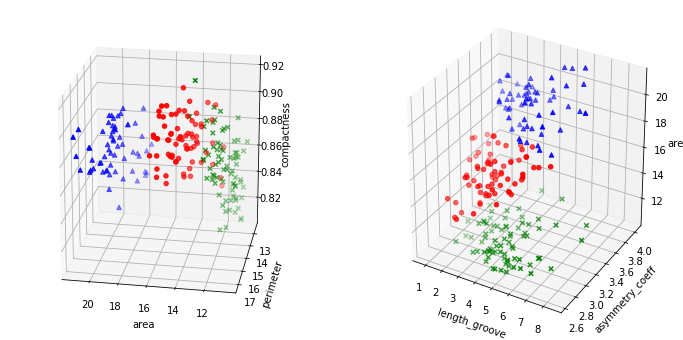

In [112]:
# what does 3d PCA clustering look like?
fig = plt.figure(figsize=(12, 6))

seeds_normalized_labeled = np.c_[seeds[seeds.columns[:-1]], kmeans_pca_three.labels_]

# show first angle
ax = fig.add_subplot(121, projection='3d', azim=100, elev=20)

for c, m, l in [('r', 'o', 0), ('b', '^', 1), ('g', 'x', 2)]:
    xs = seeds_normalized_labeled[seeds_normalized_labeled[:,-1] == l][:, 0]
    ys = seeds_normalized_labeled[seeds_normalized_labeled[:,-1] == l][:, 1]
    zs = seeds_normalized_labeled[seeds_normalized_labeled[:,-1] == l][:, 2]
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel(seeds.columns[0])
ax.set_ylabel(seeds.columns[1])
ax.set_zlabel(seeds.columns[2])
ax.set_title('')

# show second angle
ax = fig.add_subplot(122, projection='3d')

for c, m, l in [('r', 'o', 0), ('b', '^', 1), ('g', 'x', 2)]:
    xs = seeds_normalized_labeled[seeds_normalized_labeled[:,-1] == l][:, 5]
    ys = seeds_normalized_labeled[seeds_normalized_labeled[:,-1] == l][:, 4]
    zs = seeds_normalized_labeled[seeds_normalized_labeled[:,-1] == l][:, 0]
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel(seeds.columns[6])
ax.set_ylabel(seeds.columns[5])
ax.set_zlabel(seeds.columns[0])
ax.set_title('')

plt.show()

This step also appears to be of limited to no value. Sad.